Welcome to the Artifact coding challenge ! We hope you'll have fun and wish you best of luck 😀

Albert and the ear shells
=========================

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0b/AbaloneInside.jpg">

Ear shells are marine snails

The age of ear shells can be determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope - a boring and time-consuming task. 

**Albert**, a scientist and **ear shells** specialist, needs your help. He has collected data on his favorite sea creature and asks you to help him understand it. Then, he would like you to develop a model to predict the number of rings of ear shells (a proxy to their age) using other measurements which are easier to obtain.

# Part 0: Setup

Please include any setup code (including imports) in this section

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Data understanding

## Loading, processing and exploring data

Albert has provided you the dataset `abalone.csv`. Please load it and do what every diligent Data Scientist should do when received a new dataset !

In [7]:
df = pd.read_csv("earshells.csv")
df

,subset,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,price
0,train,I,0.349544,0.260194,0.074504,0.179963,0.089707,0.024760,0.054516,5.0,1.205721
1,train,F,0.545249,0.439866,0.134915,0.918132,0.428983,0.201751,0.237840,10.0,18.403463
2,test,F,0.649654,0.544545,0.175080,1.524459,0.590134,0.325970,0.495506,10.0,31.455767
3,train,I,0.500003,0.394566,0.140912,0.621133,0.292336,0.120165,0.195429,9.0,5.647747
4,train,I,0.439268,0.335001,0.110040,0.389429,0.175157,0.083279,0.110899,7.0,1.966989
...,...,...,...,...,...,...,...,...,...,...,...
3169,train,M,0.690490,0.550416,0.180363,1.692044,0.665989,0.402392,0.500689,11.0,25.770539
3170,train,I,0.345047,0.255339,0.095216,0.194550,0.091683,0.036335,0.055339,6.0,2.599017
3171,test,M,0.610011,0.460515,0.159627,0.999663,0.493984,0.197194,0.274957,10.0,13.443444
3172,train,M,0.749726,0.554736,0.214471,2.200778,1.061781,0.522346,0.527892,11.0,32.190442


In [8]:
df.columns

Index(['subset', 'sex', 'length', 'diameter', 'height', 'weight_whole',
       'weight_shucked', 'weight_viscera', 'weight_shell', 'rings', 'price'],
      dtype='object')

In [9]:
df.dtypes


subset             object
sex                object
length            float64
diameter          float64
height            float64
weight_whole      float64
weight_shucked    float64
weight_viscera    float64
weight_shell      float64
rings             float64
price             float64
dtype: object

In [11]:
df.isnull().sum()

subset             0
sex                0
length             0
diameter           0
height             0
weight_whole       0
weight_shucked     0
weight_viscera     0
weight_shell       0
rings             31
price             31
dtype: int64

In [16]:
df["sex"].unique()

array(['I', 'F', 'M'], dtype=object)

In [17]:
df["subset"].unique()

array(['train', 'test'], dtype=object)

In [21]:
df["diameter"].dtype == np.float64

True

In [12]:
df.describe()

,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,price
count,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3143.000000,3143.000000
mean,0.514369,0.400696,0.137644,0.762393,0.342232,0.171397,0.214670,8.688514,12.009276
std,0.134614,0.127081,0.085251,0.467023,0.221347,0.136742,0.134140,1.652502,8.961170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.100000
25%,0.430444,0.330102,0.105422,0.380190,0.164375,0.081057,0.111309,8.000000,4.404896
50%,0.525349,0.409146,0.135162,0.709052,0.311254,0.153026,0.200179,9.000000,10.000912
75%,0.604510,0.474409,0.159900,1.084979,0.489777,0.238163,0.296504,10.000000,18.243623
max,1.973813,3.491197,2.662290,2.987259,1.905003,3.196680,1.545075,11.000000,52.901790


In [22]:
outliers = {}
for column in df:
    if df[column].dtype == np.float64:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
outliers

{'length': Int64Index([ 136,  214,  437,  530,  582,  601,  725,  886, 1042, 1152, 1345,
             1527, 1584, 2094, 2155, 2161, 2231, 2334, 2618, 2636, 2691, 2865,
             2867, 2900, 3008, 3036],
            dtype='int64'),
 'diameter': Int64Index([ 214,  437,  531,  886, 1042, 1152, 1345, 1527, 2094, 2161, 2231,
             2247, 2334, 2618, 2636, 2858, 2865, 3036],
            dtype='int64'),
 'height': Int64Index([ 437,  530,  531,  582,  588,  601,  705,  725,  846,  886, 1042,
             1152, 1342, 1345, 1371, 1527, 1584, 2094, 2155, 2161, 2231, 2247,
             2327, 2618, 2636, 2691, 2826, 2858, 2865, 2867, 2900, 3000, 3036,
             3050],
            dtype='int64'),
 'weight_whole': Int64Index([  98,  354,  531,  588,  886,  925,  957,  959, 1252, 1282, 1386,
             1397, 1440, 1643, 1699, 2182, 2327, 2691, 2865, 2926, 2958, 3172],
            dtype='int64'),
 'weight_shucked': Int64Index([  98,  354,  588,  601,  604,  725,  925,  957,  959, 1252, 12

{'subset': <AxesSubplot: >,
 'sex': <AxesSubplot: >,
 'length': <AxesSubplot: >,
 'diameter': <AxesSubplot: >,
 'height': <AxesSubplot: >,
 'weight_whole': <AxesSubplot: >,
 'weight_shucked': <AxesSubplot: >,
 'weight_viscera': <AxesSubplot: >,
 'weight_shell': <AxesSubplot: >,
 'rings': <AxesSubplot: >,
 'price': <AxesSubplot: >}

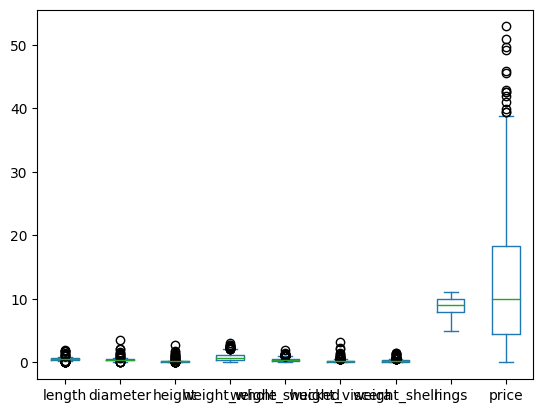

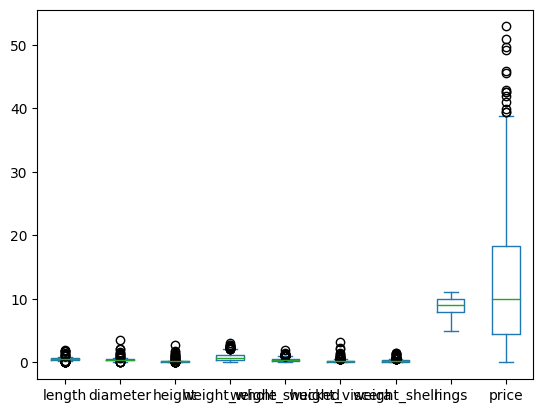

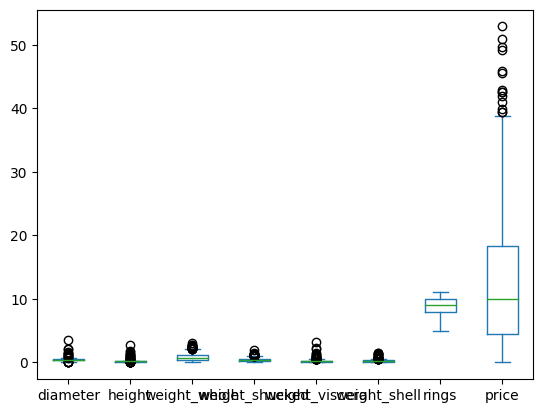

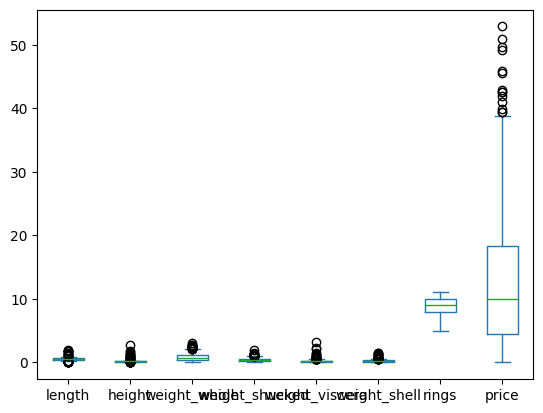

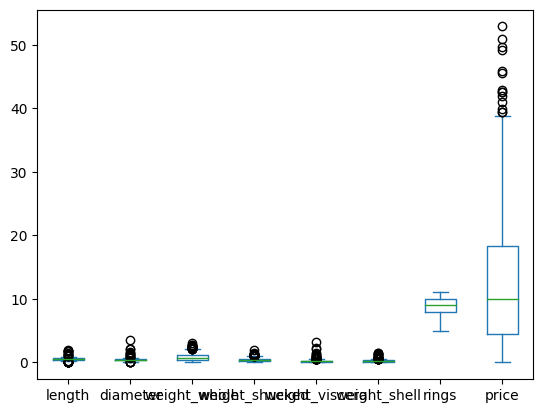

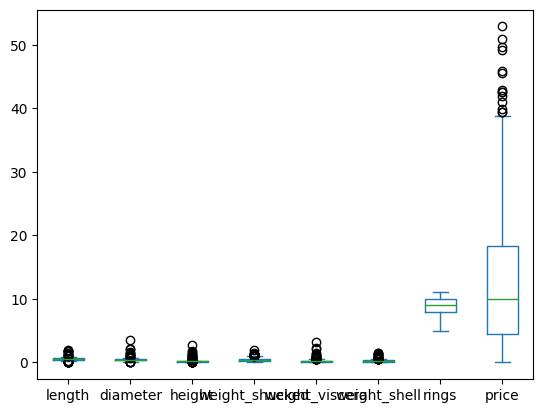

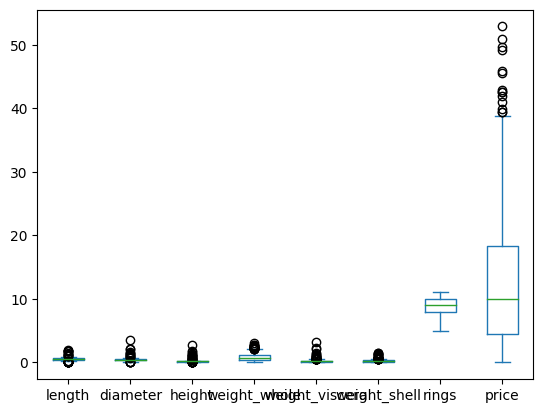

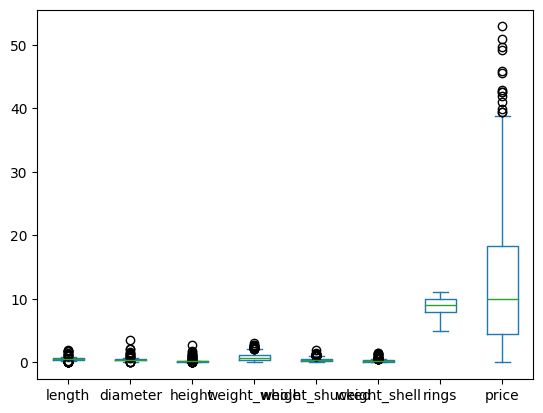

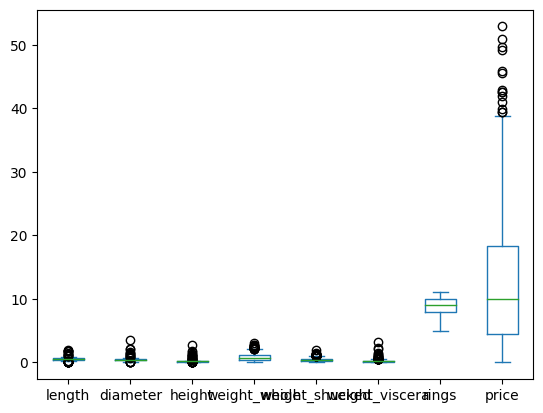

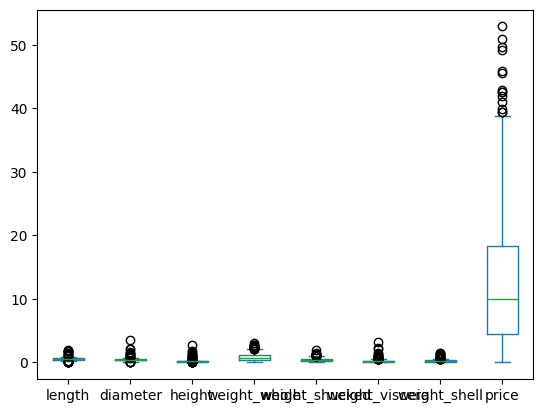

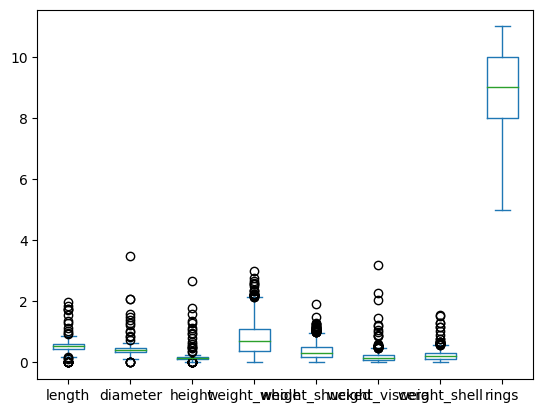

In [35]:

#Create visualization
visualizations = {}
for column in df:
    visualizations[column] = df.plot(kind='box', x=column)
#plt.show()
visualizations



In [37]:
# Data Cleaning
#def fill_missing_values(dataset, missing_values):
df.fillna(df.mean(), inplace=True)
df

#dataset = fill_missing_values(dataset, missing_values)

C:\Users\Bisagny\AppData\Local\Temp\ipykernel_24208\2277716677.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,subset,sex,length,diameter,height,weight_whole,weight_shucked,weight_viscera,weight_shell,rings,price
0,train,I,0.349544,0.260194,0.074504,0.179963,0.089707,0.024760,0.054516,5.0,1.205721
1,train,F,0.545249,0.439866,0.134915,0.918132,0.428983,0.201751,0.237840,10.0,18.403463
2,test,F,0.649654,0.544545,0.175080,1.524459,0.590134,0.325970,0.495506,10.0,31.455767
3,train,I,0.500003,0.394566,0.140912,0.621133,0.292336,0.120165,0.195429,9.0,5.647747
4,train,I,0.439268,0.335001,0.110040,0.389429,0.175157,0.083279,0.110899,7.0,1.966989
...,...,...,...,...,...,...,...,...,...,...,...
3169,train,M,0.690490,0.550416,0.180363,1.692044,0.665989,0.402392,0.500689,11.0,25.770539
3170,train,I,0.345047,0.255339,0.095216,0.194550,0.091683,0.036335,0.055339,6.0,2.599017
3171,test,M,0.610011,0.460515,0.159627,0.999663,0.493984,0.197194,0.274957,10.0,13.443444
3172,train,M,0.749726,0.554736,0.214471,2.200778,1.061781,0.522346,0.527892,11.0,32.190442


In [43]:
# Fix outliers
#def remove_outliers(dataset, outliers):
for column in outliers:
    df.drop(outliers[column], axis=0, inplace=True)
df

#dataset = remove_outliers(dataset, outliers)

KeyError: '[136, 214, 437, 530, 582, 601, 725, 886, 1042, 1152, 1345, 1527, 1584, 2094, 2155, 2161, 2231, 2334, 2618, 2636, 2691, 2865, 2867, 2900, 3008, 3036] not found in axis'

## Questions

Albert needs your help getting a deeper understanding of one particular aspect of this data: the price of ear shells. Can you help him ?

### Question 1.1

What's the **average price** for ear shells with a **diameter** falling outside the interquartile range (of diameter) ?

### Question 1.2

Albert would like to understand which factors / attributes have been used to determine the price. Please provide him with **one clear visualization** which explicits the dependency between the price and the most relevant attributes.

# Part 2: Modeling

Albert loves ML ! He asks you to use your ML skills to train a model that will predict the **number of rings** based on the other attributes.

Albert was kind enough to pre-assign the dataset samples to train-test with the `subset` attribute. `test` samples should obviously not be used during the training procedure !

# Question 2.1

Which model will you choose to accomplish this task ? Briefly explain why

## Question 2.2

Which metric would you choose to communicate the performance of your model to Albert ? Briefly explain why

## Question 2.3

How's your model performing ? Please provide the value of your chosen metric on the **test samples** and briefly discuss it

# The end !

Thank you for participating in this challenge, we hope you enjoyed it !

Don't forget to submit your work by email and to **include a zip of your work** containing:
- your notebook `challenge.ipynb`
- an export of your notebook as HTML `challenge.html`
- a `requirements.txt` file listing your dependencies
- an image of your visualization for question 1.2